In [38]:
import os 
import pickle
import numpy as np
import pandas as pd 
from glob import glob 
from sklearn.metrics import accuracy_score, classification_report
from scipy.spatial.distance import mahalanobis

import seaborn as sns

In [39]:
def dtw_distance(x, y, dist='euclidean'):
    m, n = len(x), len(y)
    dtw = np.zeros((m+1, n+1))
    
    # Initialize the first row and column of the DTW matrix
    for i in range(1, m+1):
        dtw[i, 0] = float('inf')
    for j in range(1, n+1):
        dtw[0, j] = float('inf')
    dtw[0, 0] = 0
    
    # Compute the DTW matrix
    for i in range(1, m+1):
        for j in range(1, n+1):
            if dist == 'euclidean':
              cost = euclidean_distance(x[i-1], y[j-1])  # Distance measure between elements x[i-1] and y[j-1]
            if dist == 'mahalanobis':
              cost = mahalanobis_distance(x[i-1], y[j-1])
            dtw[i, j] = cost + min(dtw[i-1, j], dtw[i, j-1], dtw[i-1, j-1])
    
    return dtw[m, n]

def euclidean_distance(a, b):
    # Calculate the distance between two elements a and b
    # Modify this function to use an appropriate distance measure for your multivariate time series
    
    # For example, Euclidean distance can be used as follows:
    return np.linalg.norm(a - b)
    
    # Alternatively, you can use other distance measures like Manhattan distance or cosine similarity
    # pass

def mahalanobis_distance(a, b):
    # Calculate the Mahalanobis distance between two elements a and b
    # cov is the covariance matrix
    # cov = np.array([[1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.],])
    
    cov = np.array([[1., 1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [1., 1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.,  0.,  0.,  0.,  0.,  0.,],
                    [0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.,  0.,  0.,  0.,  0.,  0.,],
                    [0., 0., 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 1. , 1. , 0. , 0. ,0.5, 0.5, 0. , 0. , 0. , 0. ,],
                    [0., 0., 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 1. , 1. , 0. , 0. ,0.5, 0.5, 0. , 0. , 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. ,0. , 0. , 0.5, 0.5, 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. ,0. , 0. , 0.5, 0.5, 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,1. , 1. , 0. , 0. , 0.5, 0.5,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,1. , 1. , 0. , 0. , 0.5, 0.5,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.,  0.,  1.,  1.,  0.,  0.,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.,  0.,  1.,  1.,  0.,  0.,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0.5, 0.5, 0. , 0. , 1. , 1. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0.5, 0.5, 0. , 0. , 1. , 1. ,]])
    # Calculate the Mahalanobis distance using the scipy.spatial.distance.mahalanobis function
    return mahalanobis(a, b, cov)




---

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
data_root = '/content/drive/MyDrive/22_FYP42 - Zero-shot Explainable HAR/CIKM/Ablation Study/study3/'

In [43]:
with open(f"{data_root}skeleton_label_predictions.pickle", 'rb') as handle:
    pred_skeleton_data = pickle.load(handle)

In [44]:
with open(f"{data_root}skeleton_original_seq.pickle", 'rb') as handle:
    origin_skeleton_data = pickle.load(handle)

---

In [45]:
pred_df = pd.DataFrame().from_records(pred_skeleton_data['label'])
pred_df.head()

,id,target,prediction
0,0,house cleaning,house cleaning
1,1,standing,house cleaning
2,2,standing,house cleaning
3,3,watching TV,standing
4,4,house cleaning,house cleaning


---

In [46]:
# PAMAP2
pamap2_super_dict = {
    'Static activities': ['lying', 'sitting', 'standing'],
    'Walking activities': ['walking', 'Nordic walking', 'ascending stairs', 'descending stairs'],
    'House chores': ['vacuum cleaning', 'ironing', 'folding laundry', 'house cleaning'],
    'Sports': ['running', 'cycling', 'playing soccer', 'rope jumping'],
    'Sitting activities': ['watching TV', 'computer work', 'car driving']
}


---

In [47]:
super_class = {}
for i,j in pamap2_super_dict.items():
    for c in j:
        super_class[c] = i 

In [48]:
super_class

{'lying': 'Static activities',
 'sitting': 'Static activities',
 'standing': 'Static activities',
 'walking': 'Walking activities',
 'Nordic walking': 'Walking activities',
 'ascending stairs': 'Walking activities',
 'descending stairs': 'Walking activities',
 'vacuum cleaning': 'House chores',
 'ironing': 'House chores',
 'folding laundry': 'House chores',
 'house cleaning': 'House chores',
 'running': 'Sports',
 'cycling': 'Sports',
 'playing soccer': 'Sports',
 'rope jumping': 'Sports',
 'watching TV': 'Sitting activities',
 'computer work': 'Sitting activities',
 'car driving': 'Sitting activities'}

---

In [49]:
def match_func(r):
  i = r['id']
  i_skel = pred_skeleton_data['data'][i]
  cs, dists = [], []
  for c,f in origin_skeleton_data.items():
    dists.append(dtw_distance(f, i_skel))
    cs.append(c)
  matching_class = cs[np.argmin(np.array(dists))]
  return matching_class

In [50]:
pred_df['matching'] = pred_df.apply(lambda r: match_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching
0,0,house cleaning,house cleaning,house cleaning
1,1,standing,house cleaning,house cleaning
2,2,standing,house cleaning,house cleaning
3,3,watching TV,standing,house cleaning
4,4,house cleaning,house cleaning,house cleaning


In [51]:
def score_func(r):
  i = r['id']
  i_skel = pred_skeleton_data['data'][i]
  cs, dists = [], []
  for c,f in origin_skeleton_data.items():
    dists.append(dtw_distance(f, i_skel))
    cs.append(c)
  matching_class = np.min(np.array(dists))
  return matching_class

In [52]:
pred_df['matching_dtw_dist'] = pred_df.apply(lambda r: score_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist
0,0,house cleaning,house cleaning,house cleaning,127.719535
1,1,standing,house cleaning,house cleaning,127.727353
2,2,standing,house cleaning,house cleaning,127.751162
3,3,watching TV,standing,house cleaning,127.850705
4,4,house cleaning,house cleaning,house cleaning,127.693521


---

In [53]:
pred_df['super_target'] = pred_df['target'].map(super_class)
pred_df['super_prediction'] = pred_df['prediction'].map(super_class)
pred_df['super_matching'] = pred_df['matching'].map(super_class)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching
0,0,house cleaning,house cleaning,house cleaning,127.719535,House chores,House chores,House chores
1,1,standing,house cleaning,house cleaning,127.727353,Static activities,House chores,House chores
2,2,standing,house cleaning,house cleaning,127.751162,Static activities,House chores,House chores
3,3,watching TV,standing,house cleaning,127.850705,Sitting activities,Static activities,House chores
4,4,house cleaning,house cleaning,house cleaning,127.693521,House chores,House chores,House chores


In [54]:
pred_df['correct'] = (pred_df['target'] == pred_df['prediction']).astype(int)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching,correct
0,0,house cleaning,house cleaning,house cleaning,127.719535,House chores,House chores,House chores,1
1,1,standing,house cleaning,house cleaning,127.727353,Static activities,House chores,House chores,0
2,2,standing,house cleaning,house cleaning,127.751162,Static activities,House chores,House chores,0
3,3,watching TV,standing,house cleaning,127.850705,Sitting activities,Static activities,House chores,0
4,4,house cleaning,house cleaning,house cleaning,127.693521,House chores,House chores,House chores,1


In [55]:
# super class accuracy 
correct_df = pred_df.loc[pred_df['correct'] == 1, :]
print(accuracy_score(y_true=correct_df['super_prediction'], y_pred=correct_df['super_matching']))
print(classification_report(y_true=correct_df['super_prediction'], y_pred=correct_df['super_matching'], zero_division=0))

0.42424242424242425
                    precision    recall  f1-score   support

      House chores       0.42      1.00      0.60        14
Sitting activities       0.00      0.00      0.00         1
 Static activities       0.00      0.00      0.00         7
Walking activities       0.00      0.00      0.00        11

          accuracy                           0.42        33
         macro avg       0.11      0.25      0.15        33
      weighted avg       0.18      0.42      0.25        33



In [56]:
# super class tendency - predictiion super class 
incorrect_df = pred_df.loc[pred_df['correct'] == 0, :]
print(accuracy_score(y_true=incorrect_df['super_prediction'][:-1], y_pred=incorrect_df['super_matching'][:-1]))
print(classification_report(y_true=incorrect_df['super_prediction'][:-1], y_pred=incorrect_df['super_matching'][:-1], zero_division=0))

0.5
                    precision    recall  f1-score   support

      House chores       0.50      1.00      0.67        15
 Static activities       0.00      0.00      0.00        12
Walking activities       0.00      0.00      0.00         3

          accuracy                           0.50        30
         macro avg       0.17      0.33      0.22        30
      weighted avg       0.25      0.50      0.33        30



In [57]:
# super class tendency - predictiion super class 
incorrect_df = pred_df.loc[pred_df['correct'] == 0, :]
print(accuracy_score(y_true=incorrect_df['super_target'][:-1], y_pred=incorrect_df['super_matching'][:-1]))
print(classification_report(y_true=incorrect_df['super_target'][:-1], y_pred=incorrect_df['super_matching'][:-1], zero_division=0))

0.13333333333333333
                    precision    recall  f1-score   support

      House chores       0.13      1.00      0.24         4
Sitting activities       0.00      0.00      0.00        11
 Static activities       0.00      0.00      0.00        15

          accuracy                           0.13        30
         macro avg       0.04      0.33      0.08        30
      weighted avg       0.02      0.13      0.03        30



In [58]:
# overall interpretability 
print(accuracy_score(y_true=pred_df['super_prediction'][:-1], y_pred=pred_df['super_matching'][:-1]))
print(classification_report(y_true=pred_df['super_prediction'][:-1], y_pred=pred_df['super_matching'][:-1], zero_division=0))

0.4603174603174603
                    precision    recall  f1-score   support

      House chores       0.46      1.00      0.63        29
Sitting activities       0.00      0.00      0.00         1
 Static activities       0.00      0.00      0.00        19
Walking activities       0.00      0.00      0.00        14

          accuracy                           0.46        63
         macro avg       0.12      0.25      0.16        63
      weighted avg       0.21      0.46      0.29        63



---

In [59]:
def apply_func(r):
  i = r['id']
  return dtw_distance(origin_skeleton_data[r['matching']], pred_skeleton_data['data'][i])

In [60]:
pred_df['dtw_distance'] = pred_df.apply(lambda r: apply_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching,correct,dtw_distance
0,0,house cleaning,house cleaning,house cleaning,127.719535,House chores,House chores,House chores,1,127.719535
1,1,standing,house cleaning,house cleaning,127.727353,Static activities,House chores,House chores,0,127.727353
2,2,standing,house cleaning,house cleaning,127.751162,Static activities,House chores,House chores,0,127.751162
3,3,watching TV,standing,house cleaning,127.850705,Sitting activities,Static activities,House chores,0,127.850705
4,4,house cleaning,house cleaning,house cleaning,127.693521,House chores,House chores,House chores,1,127.693521


In [ ]:
def apply_func(r):
  i = r['id']
  return dtw_distance(origin_skeleton_data[r['matching']], pred_skeleton_data['data'][i], dist='mahalanobis')

pred_df['mahalanobis_distance'] = pred_df.apply(lambda r: apply_func(r), axis=1)
pred_df.head()

In [ ]:
pred_df.loc[pred_df['correct'] == 0, :]['dtw_distance'][:-1].mean(), pred_df.loc[pred_df['correct'] == 0, :]['mahalanobis_distance'][:-1].mean()

In [ ]:
pred_df.loc[pred_df['correct'] == 0, :]['dtw_distance'][:-1].std(), pred_df.loc[pred_df['correct'] == 0, :]['mahalanobis_distance'][:-1].std()

In [ ]:
pred_df.loc[pred_df['correct'] == 1, :]['dtw_distance'].mean(), pred_df.loc[pred_df['correct'] == 1, :]['mahalanobis_distance'].mean()

In [ ]:
pred_df.loc[pred_df['correct'] == 1, :]['dtw_distance'].std(), pred_df.loc[pred_df['correct'] == 1, :]['mahalanobis_distance'].std()

In [ ]:
pred_df.loc[pred_df['correct'] == 1, :].head()

---

In [62]:
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def discrete_frechet_distance(P, Q):
    n = len(P)
    m = len(Q)
    
    # Create a memoization table to store computed distances
    memo = np.full((n, m), -1.0)
    
    def _dfs(i, j):
        if memo[i, j] > -1.0:
            return memo[i, j]
        
        result = 0.0
        
        if i == 0 and j == 0:
            result = euclidean_distance(P[0], Q[0])
        elif i > 0 and j == 0:
            result = max(_dfs(i - 1, 0), euclidean_distance(P[i], Q[0]))
        elif i == 0 and j > 0:
            result = max(_dfs(0, j - 1), euclidean_distance(P[0], Q[j]))
        elif i > 0 and j > 0:
            result = max(
                min(
                    _dfs(i - 1, j),
                    _dfs(i - 1, j - 1),
                    _dfs(i, j - 1)
                ),
                euclidean_distance(P[i], Q[j])
            )
        
        memo[i, j] = result
        return result
    
    return _dfs(n - 1, m - 1)


In [63]:
def skeleton_dfd(skel1, skel2):
  rsh_skel1 = skel1.reshape((60,12,2))
  rsh_skel2 = skel2.reshape((60,12,2))

  total_dist = 0.0
  for j in range(12):
    total_dist += discrete_frechet_distance(rsh_skel1[:,j,:], rsh_skel2[:,j,:])

  return total_dist

In [64]:
def fretch_func(r):
  i = r['id']
  match_class = r['matching']
  i_skel = pred_skeleton_data['data'][i]
  match_skel = origin_skeleton_data[match_class]
  dist = skeleton_dfd(i_skel, match_skel)
  return dist

In [65]:
pred_df['dfd_dist'] = pred_df.apply(lambda r: fretch_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching,correct,dtw_distance,dfd_dist
0,0,house cleaning,house cleaning,house cleaning,127.719535,House chores,House chores,House chores,1,127.719535,7.410748
1,1,standing,house cleaning,house cleaning,127.727353,Static activities,House chores,House chores,0,127.727353,7.405335
2,2,standing,house cleaning,house cleaning,127.751162,Static activities,House chores,House chores,0,127.751162,7.412647
3,3,watching TV,standing,house cleaning,127.850705,Sitting activities,Static activities,House chores,0,127.850705,7.470526
4,4,house cleaning,house cleaning,house cleaning,127.693521,House chores,House chores,House chores,1,127.693521,7.430729


In [66]:
pred_df.loc[pred_df['correct'] == 0, :]['matching_dtw_dist'][:-1].mean(), pred_df.loc[pred_df['correct'] == 0, :]['dfd_dist'][:-1].mean()

(127.75102861545733, 7.42280350701491)

In [67]:
pred_df.loc[pred_df['correct'] == 0, :]['matching_dtw_dist'][:-1].std(), pred_df.loc[pred_df['correct'] == 0, :]['dfd_dist'][:-1].std()

(0.04869571340497439, 0.020788494488748716)

In [68]:
pred_df.loc[pred_df['correct'] == 1, :]['matching_dtw_dist'][:-1].mean(), pred_df.loc[pred_df['correct'] == 1, :]['dfd_dist'][:-1].mean()

(127.73788094195257, 7.420701351297011)

In [69]:
pred_df.loc[pred_df['correct'] == 1, :]['matching_dtw_dist'][:-1].std(), pred_df.loc[pred_df['correct'] == 1, :]['dfd_dist'][:-1].std()

(0.045034569252505235, 0.017604012844882392)

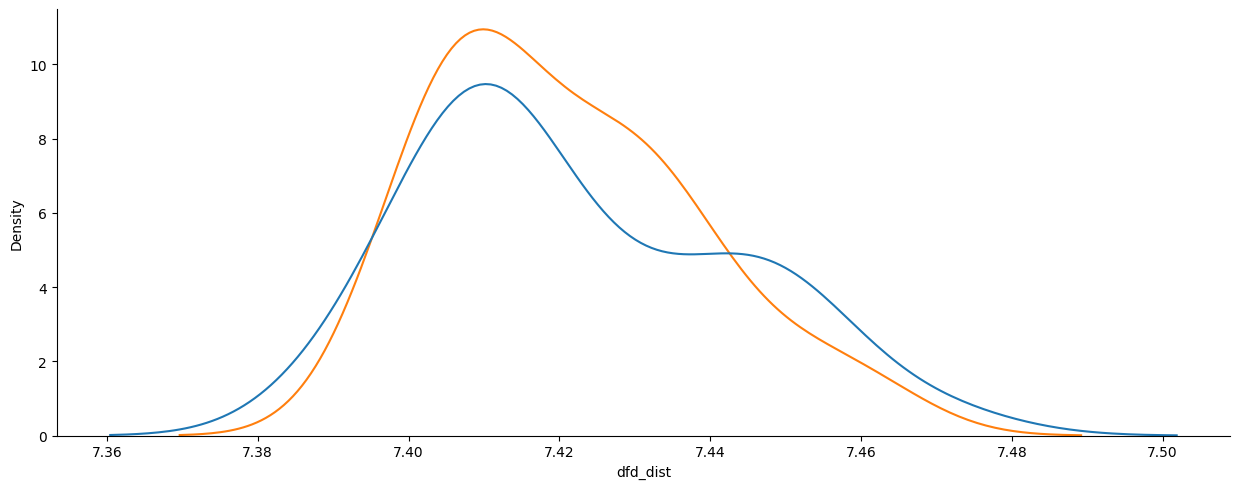

In [70]:
sns_plot = sns.displot(data=pred_df, x="dfd_dist", hue="correct", color='blue', kind="kde", legend=False, height=5, aspect=2.5)